In [17]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

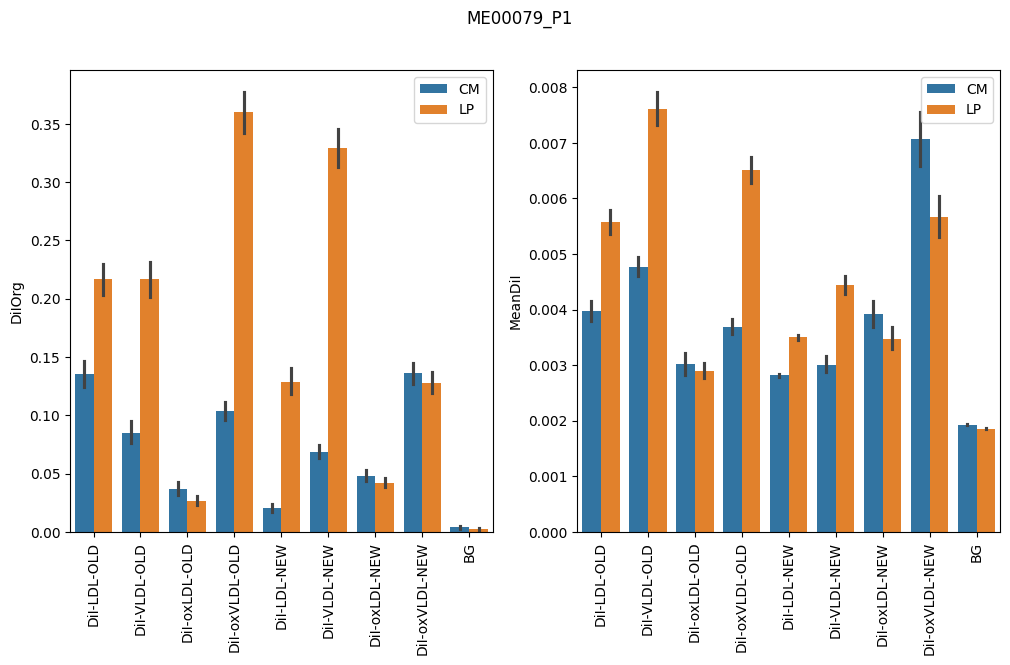

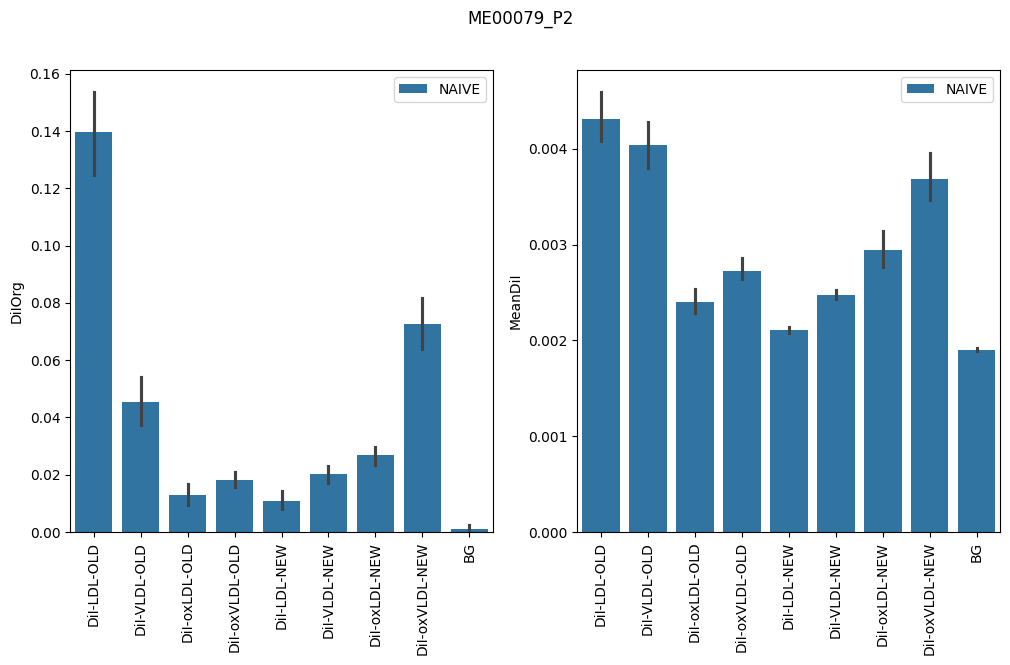

In [19]:
run_name = 'ME00079'
directory = f'/home/siina/Documents/projects/{run_name}'
sel_readouts = ['DiIOrg', 'MeanDiI']
data_dir = os.path.join(directory,'out_results/single_cell_cleaned')
save_dir = os.path.join(directory,'Figures')

for exp in ['P1','P2']:
    #exp = 'P1'
    exp_name = run_name + '_' + exp
    # Cleaned data
    df = pd.read_csv(os.path.join(data_dir,f'{exp_name}_cell_clean.csv'))
    # Description
    desc = pd.read_csv(os.path.join(directory,f'description_files/{run_name}.csv'))
    # Order of labels
    desc = desc.sort_values(by='Number')
    order = desc['Label'].dropna().values.tolist()
    order = order
    # add label from description file
    df = pd.merge(df,desc[['Number','Label']],left_on = 'Sample', right_on = 'Number', how='left')
    # Plot
    fig, axes = plt.subplots(1,2,figsize = (12,6))
    for i,r in enumerate(sel_readouts):  
        ax = axes[i]
        sns.barplot(data=df,x='Label',y=r, hue='treatment',order=order,ax=ax)
        #ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        ax.tick_params(axis='x', rotation=90)
        ax.set_xlabel('')
        ax.legend(title='')
    plt.suptitle(exp_name)
    plt.savefig(os.path.join(save_dir,f'{exp_name}.png'),dpi=300, bbox_inches='tight')